In [23]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Read in df

In [24]:
df = pd.read_csv('AirQuality.csv')
train_df = pd.read_csv('Train.csv')
validate_df = pd.read_csv('Validate.csv')
test_df = pd.read_csv('Test.csv')
df_pca = pd.read_csv('PCA.csv')

HMM to predict AQI value for each pollutant

In [25]:
# Select the AQI variable ('Daily AQI Value CO', 'Daily AQI Value NO2',
                        # 'Daily AQI Value Ozone', 'Daily AQI Value PM2.5',
                        # 'Daily AQI Value PM10', 'Daily AQI Value SO2')
aqi_var = 'Daily AQI Value PM2.5'

def run_hmm(aqi_var, n_states=4, plot=False):
    train = train_df[['Date', aqi_var]].copy()
    validate = validate_df[['Date', aqi_var]].copy()
    test = test_df[['Date', aqi_var]].copy()

    # Scale the AQI values for stability
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[[aqi_var]])
    validate_scaled = scaler.transform(validate[[aqi_var]])
    test_scaled = scaler.transform(test[[aqi_var]])

    # Train the HMM
    hmm = GaussianHMM(n_components=n_states, covariance_type='diag', n_iter=200, random_state=42)
    hmm.fit(train_scaled)

    # Predict hidden states on train, validate, and test sets 
    train['Hidden_State'] = hmm.predict(train_scaled)
    validate['Hidden_State'] = hmm.predict(validate_scaled)
    test['Hidden_State'] = hmm.predict(test_scaled)

    # Plot hidden states vs AQI 
    if plot:
        def plot_hidden_states(df, title):
            plt.figure(figsize=(12, 5))
            for state in range(n_states):
                mask = df['Hidden_State'] == state
                plt.plot(df['Date'][mask], df[aqi_var][mask], '.', label=f'State {state}')
            plt.title(title)
            plt.xlabel('Date')
            plt.ylabel(aqi_var)
            plt.legend()
            plt.tight_layout()
            plt.show()

        plot_hidden_states(train, 'Train Data: Inferred Hidden States')
        plot_hidden_states(validate, 'Validation Data: Inferred Hidden States')
        plot_hidden_states(test, 'Test Data: Inferred Hidden States')

    # Forecast next hidden state based on latest validation state
    last_val_state = validate['Hidden_State'].iloc[-1]
    next_state_probs = hmm.transmat_[last_val_state]
    most_likely_next_state = np.argmax(next_state_probs)

    print(f'\nMost recent hidden state in validation: {last_val_state}')
    print(f'Most likely next hidden state: {most_likely_next_state} (Probability: {next_state_probs[most_likely_next_state]:.2f})')

    # Sample possible AQI values from predicted state
    samples, _ = hmm.sample(3)  # Generate 3 days of samples
    samples_unscaled = scaler.inverse_transform(samples)
    print(f'Sampled next 3 {aqi_var}:', samples_unscaled.flatten())



Most recent hidden state in validation: 1
Most likely next hidden state: 1 (Probability: 0.68)
Sampled next 3 Daily AQI Value CO: [3.51487009 3.64457185 3.64095843]

Most recent hidden state in validation: 2
Most likely next hidden state: 2 (Probability: 0.69)
Sampled next 3 Daily AQI Value NO2: [29.38828953 38.83525835  7.78544489]

Most recent hidden state in validation: 2
Most likely next hidden state: 2 (Probability: 0.92)
Sampled next 3 Daily AQI Value Ozone: [16.47367103 26.80414782 26.51634581]

Most recent hidden state in validation: 3
Most likely next hidden state: 3 (Probability: 0.94)
Sampled next 3 Daily AQI Value PM2.5: [48.76133237 81.95527567 30.2634496 ]

Most recent hidden state in validation: 3
Most likely next hidden state: 3 (Probability: 0.74)
Sampled next 3 Daily AQI Value PM10: [18.13803854 18.89059351 18.8696277 ]


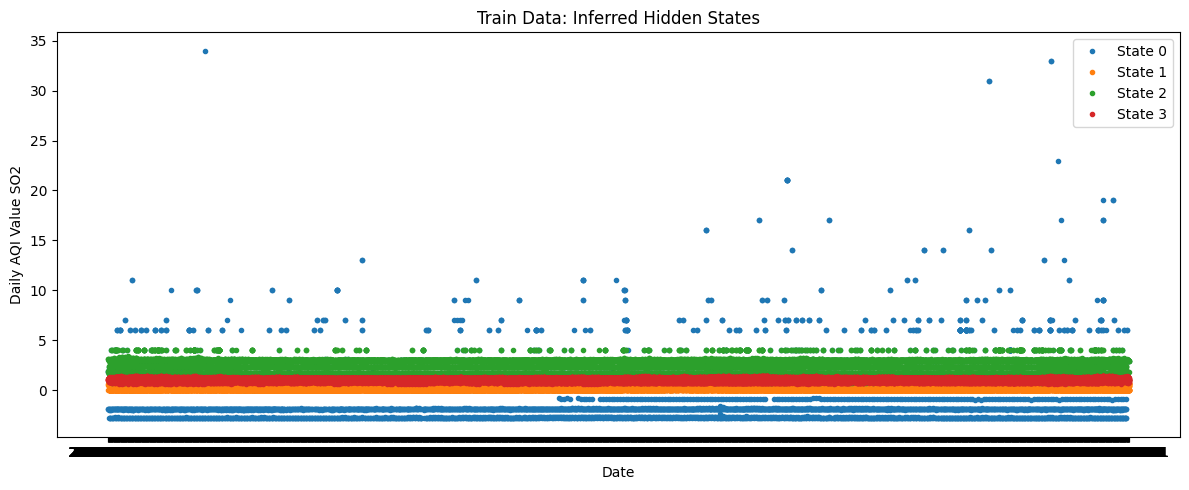

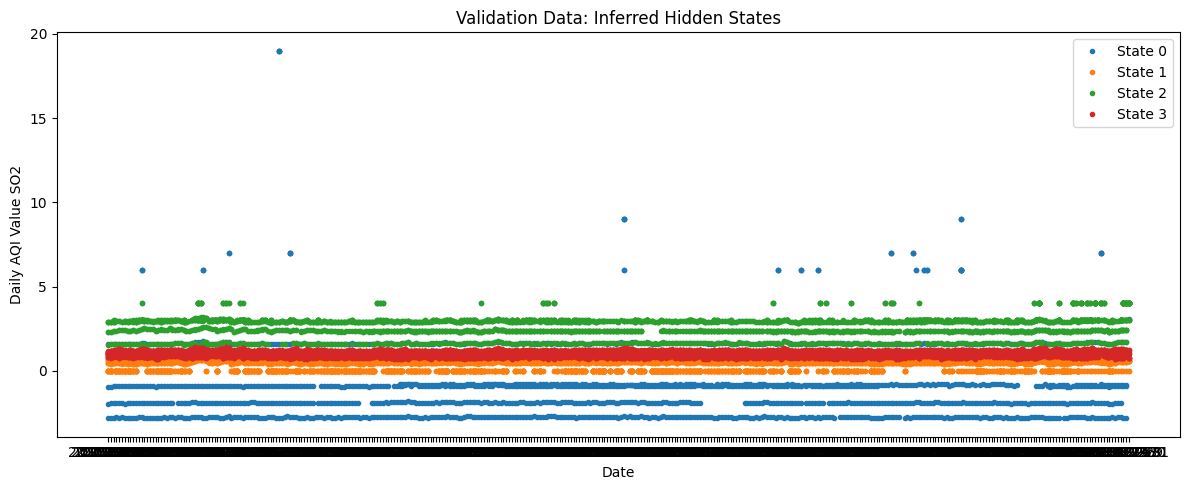

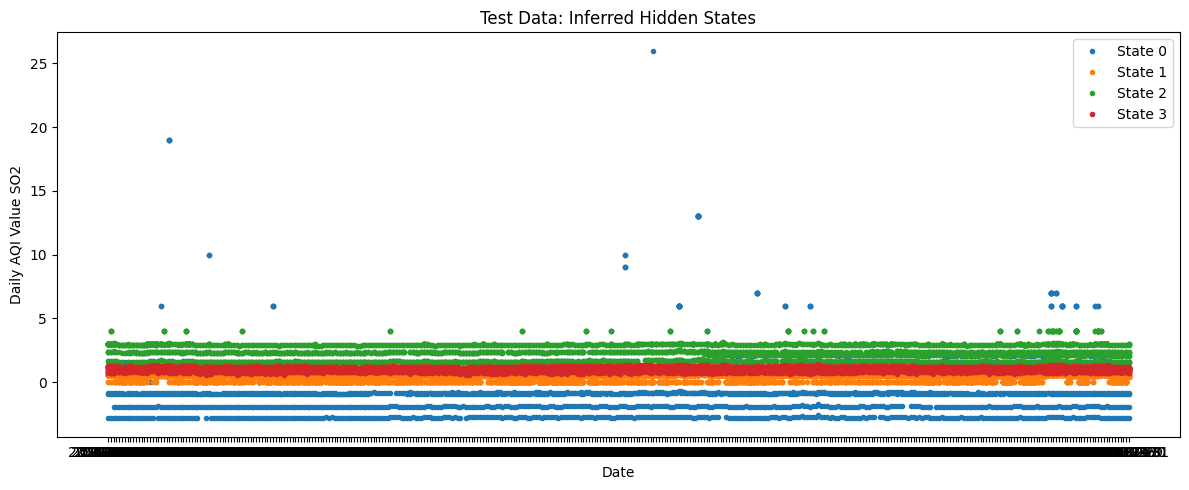


Most recent hidden state in validation: 2
Most likely next hidden state: 2 (Probability: 0.62)
Sampled next 3 Daily AQI Value SO2: [0.88960723 0.4407945  1.05328594]


In [26]:
run_hmm('Daily AQI Value CO', n_states=4, plot=False)
run_hmm('Daily AQI Value NO2', n_states=4, plot=False)
run_hmm('Daily AQI Value Ozone', n_states=4, plot=False)
run_hmm('Daily AQI Value PM2.5', n_states=4, plot=False)
run_hmm('Daily AQI Value PM10', n_states=4, plot=False)
run_hmm('Daily AQI Value SO2', n_states=4, plot=True)